<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Analysis-and-Model-training" data-toc-modified-id="Splitting-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Splitting the data</a></span></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Selection</a></span></li><li><span><a href="#Model-Testing" data-toc-modified-id="Model-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Testing</a></span></li><li><span><a href="#Model-Adequacy-Check" data-toc-modified-id="Model-Adequacy-Check-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Adequacy Check</a></span></li></ul></div>

# Recommender System Development

Goal: develop a machine learning algorithm for recommender system development.  

Requirements: accuracy not less than 0.75 for the test set. 

## Data Preparation

Upload the data and the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#df = pd.read_csv('/datasets/users_behavior.csv')
df = pd.read_csv(r'C:\Users\HP\Downloads\users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Multicollinearity check

In [ ]:
df.loc[:, ['calls', 'minutes', 'messages', 'mb_used']].corr()

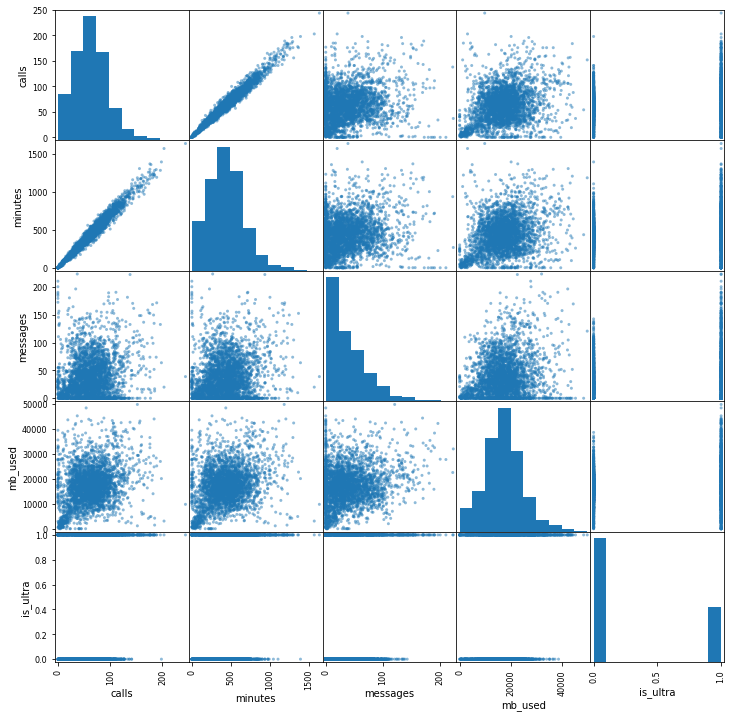

In [7]:
pd.plotting.scatter_matrix(df, figsize=(12, 12));

From correlation table and scatter matrix is seen that features 'minutes' and 'calls' are closely correlated. One of them should be romoved for further analysis.

In [8]:
df = df.drop(['minutes'], axis=1)

__Summary__

Dataset was uploaded and prepared for further analysis.

## Splitting the data

In [9]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

In [10]:
#Splitting with stratify parameter
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.20, random_state=12345, stratify=target)

In [11]:
#Splitting with stratify parameter
features_train, features_test, target_train, target_test = train_test_split(
    features_train, target_train, test_size=0.25, random_state=12345, stratify=target_train)

In [12]:
print('Trainig set:', len(features_train), '\n'
     'Test set:', len(features_test), '\n'
     'Validation set:', len(features_valid))

Trainig set: 1928 
Test set: 643 
Validation set: 643


## Model Selection 

__Check Decision Tree Classifier performance__

In [13]:
best_model_DecisionTree = None
best_result = 0
for depth in range(1, 11):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) 
    model.fit(features_train, target_train) 
    predictions = model.predict(features_valid)
    result = accuracy_score(target_valid, predictions) 
    if result > best_result:
        best_model_DecisionTree = model
        best_result = result
        best_depth = depth
print("Accuracy of the best Decision Tree Classifier model for validation set:", '{:.3f}'.format(best_result))  
print("Tree depth:", best_depth)

Accuracy of the best Decision Tree Classifier model for validation set: 0.810
Tree depth: 5


__Check Random Forest Classifier performance__

In [14]:
best_model = None
best_result = 0
best_depth = 0
for est in range(1, 40):
    for depth in range(1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        if result > best_result:
            best_model = model 
            best_result = result
            best_est = est
            best_depth = depth
print("Accuracy of the best Random Forest Classifier model fot validation set:", '{:.3f}'.format(best_result))
print("Amount of trees:", best_est)
print("Tree depth:", best_depth)

Accuracy of the best Random Forest Classifier model fot validation set: 0.818
Amount of trees: 24
Tree depth: 12


Add progress meter

In [15]:
from tqdm.notebook import tqdm
best_model = None
best_result = 0
acc = []
estt = []
depthh = []
for est in tqdm(range(1, 40)):
    for depth in tqdm(range(1, 20)):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) 
        model.fit(features_train, target_train) 
        result = model.score(features_valid, target_valid) 
        acc.append(result)
        estt.append(est)
        depthh.append(depth)

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

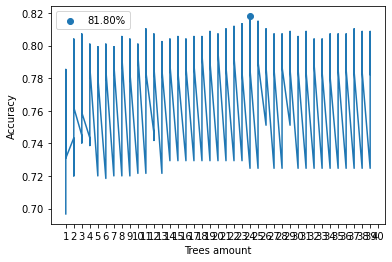

In [16]:
plt.plot(estt,acc)
plt.scatter(estt[acc.index(max(acc))], max(acc), label= f'{max(acc):.2%}');
plt.legend();
plt.xlabel('Trees amount');
plt.ylabel('Accuracy');
plt.xticks(range(1, 41));

__Check Logistic Regression performance__

In [17]:
model_log_reg = LogisticRegression(random_state=12345)
model_log_reg.fit(features_train, target_train)
result_log_reg = model_log_reg.score(features_valid, target_valid) 

print("Accuracy of Logistic Regression model for validation set:", '{:.3f}'.format(result_log_reg))

Accuracy of Logistic Regression model for validation set: 0.703


### __Summary__

The highest accuracy (0.818) for validation set was shown by Random Forest Classifier model with 24 trees and max tree depth =  12. 
The lowest accuracy (0.703) for validation set was shown by Logistic Regression model.

## Model Testing

Train the best model on merged training and validation datasets to improve model's performance.

In [18]:
model = RandomForestClassifier(random_state=12345, n_estimators=24, max_depth=12)
features_join = pd.concat([features_train, features_valid])
target_join = pd.concat([target_train, target_valid])
model.fit(features_join, target_join)
resuls_rand_forest_test = model.score(features_test, target_test)

print("Accuracy of the best Random Forest Classifier model for test set:", '{:.3f}'.format(resuls_rand_forest_test))

Accuracy of the best Random Forest Classifier model for test set: 0.813


### __Summary__

Accuracy of the best Random Forest Classifier model for test set is 0.813.

## Model Adequacy Check

Count amount of plans in original dataset

In [19]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

Calculate percentage

In [20]:
smart_0 = 2229/(2229 + 985) * 100
ultra_1 = 985/(2229 + 985) * 100
print("smart:", round(smart_0, 2), "ultra:", round(ultra_1, 2))

smart: 69.35 ultra: 30.65


About 70% of customers are using plan 'smart'. If plan 'smart' was offered to all customers in the first place, accuracy would be 0.7 which is lower than optimized Random Forest Classifier model accuracy (0.813). Proposed model is adequate.

## Conclusion

The following models were selected and tested for classification task: Decision Tree Classifier, Random Forest Classifier and Logistic Regression. The highest accuracy was shown by Random Forest Classifier model (0.813) with optimized hyper-parameters. 